In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict 
import seaborn as sns

In [2]:
## Datasets
data_domains=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\machine-learning-for-yeast\datasets-for-learning\proteins-domains-from-Pfam.xlsx',header=0,index_col='Unnamed: 0')
data_domains=data_domains.dropna()
data_sl=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\machine-learning-for-yeast\datasets-for-learning\data-synthetic-lethals.xlsx',header=0)
data_nonsl=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\machine-learning-for-yeast\datasets-for-learning\data-phenotypic-enhancement.xlsx',header=0)



In [68]:
## Building the feature matrix
## One matrix for true SL where each column is one pair of SL. Every column will be a vector of  0,1 or 2 depending on the comparison with the domain list. for colum i the jth element = 0 if the jth element of the domain list is not in neither protein A and B, 1, if it is in one of them and 2 if it is in both of them .  




In [3]:
########################## Building the feature matrix#################################
domain_id_list=data_domains['domain-id']
query_gene=data_sl['gene-query-name']
target_gene=data_sl['gene-target-name']
query_gene_nonlethal=data_nonsl['gene-query-name']
target_gene_nonlethal=data_nonsl['gene-target-name']


protein_a_list=[]
protein_b_list=[]
protein_a_list_non=[]
protein_b_list_non=[]

for m in np.arange(0,500):
    protein_a=data_domains[data_domains['name']==query_gene[m]]
    protein_b=data_domains[data_domains['name']==target_gene[m]]
    protein_a_list.append(protein_a['domain-id'].tolist())
    protein_b_list.append(protein_b['domain-id'].tolist())

    protein_a_non=data_domains[data_domains['name']==query_gene_nonlethal[m]]
    protein_b_non=data_domains[data_domains['name']==target_gene_nonlethal[m]]
    protein_a_list_non.append(protein_a_non['domain-id'].tolist())
    protein_b_list_non.append(protein_b_non['domain-id'].tolist())
    

In [4]:
x=[1,2,3,7,5,6,7,8]
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
get_indexes(7,x) 



[3, 6]

In [4]:
########################## Building the feature matrix for lethals pairs#################################
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]

x = np.unique(domain_id_list)
protein_feat_true=np.zeros(shape=(len(x),len(protein_a_list)))
index_a=[]
for i in np.arange(0,len(protein_a_list)):
    pair=[protein_a_list[i],protein_b_list[i]]
    pair_a_b=np.concatenate(pair).ravel()
    for j in pair_a_b:
        index_a.append(get_indexes(j,x))

    array,index,counts=np.unique(index_a,return_index=True,return_counts=True)
    for k,m in zip(counts,index):
        if k >=2:
            protein_feat_true[index_a[m],i]=2
            
        if k==1:
            protein_feat_true[index_a[m],i]=1
            # print(index_a[m],i)



    



In [26]:
protein_feat_true_pd=pd.DataFrame(protein_feat_true.T)
stats_lethals=protein_feat_true_pd.describe()
stats_lethals.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [18]:
print(stats_lethals.iloc[1,:].mean(),stats_lethals.iloc[2,:].mean())

0.043462570914625735 0.024929731966726102


In [34]:
sns_plot=sns.heatmap(protein_feat_true_pd,vmin=0,vmax=2,cmap="inferno",center=1)

sns_plot.set(xlabel='protein-domains-indexes',ylabel='SL-protein-pairs')
fig = sns_plot.get_figure()
fig.tight_layout()

#fig.savefig('heatmap-data-true-0-3000-proteins-domains.png',dpi=300,format='png',transparent=True) 

In [6]:
########################## Building the feature matrix for non-lethals pairs#################################

x = np.unique(domain_id_list)
protein_feat_nonlethal=np.zeros(shape=(len(x),len(protein_a_list_non)))
index_a=[]
for i in np.arange(0,len(protein_a_list_non)):
    pair=[protein_a_list_non[i],protein_b_list_non[i]]
    pair_a_b=np.concatenate(pair).ravel()
    for j in pair_a_b:
        index_a.append(get_indexes(j,x))
        
    array,index,counts=np.unique(index_a,return_index=True,return_counts=True)
    for k,m in zip(counts,index):
        if k >=2:
            protein_feat_nonlethal[index_a[m],i]=2
        if k==1:
            protein_feat_nonlethal[index_a[m],i]=1



In [9]:
protein_feat_nonlethal_pd=pd.DataFrame(protein_feat_nonlethal.T)
stats_nonlethal=protein_feat_nonlethal_pd.describe()

In [20]:
print(stats_nonlethal.iloc[1,:].mean(),stats_nonlethal.iloc[2,:].mean())

0.08261021170610221 0.05339110606792749


In [8]:
sns_plot=sns.heatmap(protein_feat_nonlethal_pd,vmin=0,vmax=2,cmap="inferno",center=1)

sns_plot.set(xlabel='protein-domains-indexes',ylabel='SL-protein-pairs')
fig = sns_plot.get_figure()
fig.tight_layout()

#fig.savefig('heatmap-data-nonSL-proteins-domains.png',dpi=300,format='png',transparent=True) 

In [108]:
########################## Building the feature matrix for all #################################
#protein_feat_true_pd=pd.DataFrame(protein_feat_true.T)
protein_feat_true_pd['lethality']=np.ones(shape=(500))
#protein_feat_nonlethal_pd=pd.DataFrame(protein_feat_nonlethal.T)
protein_feat_nonlethal_pd['lethality']=0*np.ones(shape=(500))
data_all=pd.concat([protein_feat_true_pd,protein_feat_nonlethal_pd])

In [109]:
data_all=data_all.set_index(np.arange(0,1000))



In [123]:
data_all.to_excel('feature-matrix-all.xlsx')

In [2]:
############## Read the data ############################

data_all=pd.read_excel('feature-matrix-all.xlsx')

In [9]:
mu, sigma = 0, 0.1 
# creating a noise with the same dimension as the dataset (2,2) 
noise = np.random.normal(mu, sigma, [1000,7228]) 

In [110]:
X, y = data_all.drop(columns=["lethality"]), data_all["lethality"]


In [10]:
X=noise+X
X=X.drop(columns='Unnamed: 0')

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.3, random_state= 0)

In [112]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [113]:
from sklearn.decomposition import PCA
pca = PCA() 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1
print(k)

7


Text(0.5, 0, 'Principal Components')

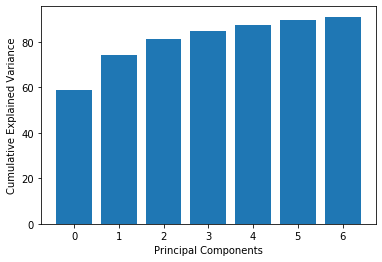

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
cum_sum = pca.explained_variance_ratio_.cumsum()
cum_sum = cum_sum*100
plt.bar(range(7), cum_sum)
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("Principal Components")


In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
search = GridSearchCV(SVC(), parameters, n_jobs=-1, verbose=1)
search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    5.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [116]:
best_parameters = search.best_estimator_
print(best_parameters)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [117]:
model=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
model.fit(X_train, y_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [118]:
y_pred=model.predict(X_test)

len(y_pred[y_pred==y_test]),len(y_pred)



(300, 300)

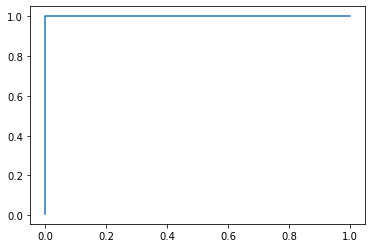

In [119]:
import sklearn.metrics as metrics
scores=model.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_pred, scores)
plt.plot(fpr,tpr)


In [120]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
print('Accuracy Score:',round(accuracy_score(y_test, y_pred),2))
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy Score: 1.0


Text(0.5, 257.44, 'Predicted label')

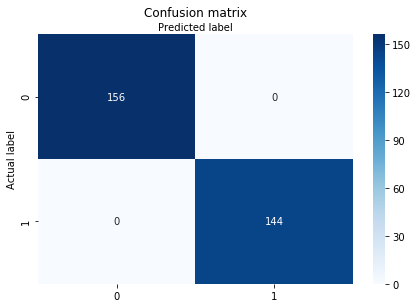

In [121]:
class_names=[1,2,3]
fig, ax = plt.subplots()
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sklearn.metrics as metrics
cm = confusion_matrix(y_test, y_pred)
class_names=['ALL', 'AML']

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [122]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 1.0
Recall: 1.0


In [29]:
from sklearn import model_selection
scores = model_selection.cross_val_score(model, X_test ,y_test, cv=10)

In [30]:
scores

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.88888889, 1.        ])

In [93]:
from sklearn import tree
tre = tree.DecisionTreeClassifier()
tre.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [96]:
sum(abs(tre.predict(X_train) - y_train))

tre.decision_path

<bound method BaseDecisionTree.decision_path of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

In [99]:
def get_lineage(tree, feature_names):
     left      = tree.tree_.children_left
     right     = tree.tree_.children_right
     threshold = tree.tree_.threshold
     features  = [feature_names[i] for i in tree.tree_.feature]

     # get ids of child nodes
     idx = np.argwhere(left == -1)[:,0]     

     def recurse(left, right, child, lineage=None):          
          if lineage is None:
               lineage = [child]
          if child in left:
               parent = np.where(left == child)[0].item()
               split = 'l'
          else:
               parent = np.where(right == child)[0].item()
               split = 'r'

          lineage.append((parent, split, threshold[parent], features[parent]))

          if parent == 0:
               lineage.reverse()
               return lineage
          else:
               return recurse(left, right, parent, lineage)

     for child in idx:
          for node in recurse(left, right, child):
               print (node)

In [100]:
get_lineage(tre, X.columns)

(0, 'l', -9.807498931884766, 0)
1
(0, 'r', -9.807498931884766, 0)
2
